# Latent Semantic Analysis Model
In this model, a Word-Document Matrix is created, where each row represent the frequency of the word in each corresponding document.

The frequency is converted to log frequency weighted by the word's overall importance over the documents, to de-emphasize the influence of unimportant frequent words.

This transformed matrix is then factorized using Truncated Singular Value Decomposition(SVD) technique to infer latent dimensions from a multi-dimensional representation.

### Import all the neccessary libraries

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from nltk.corpus import stopwords


### Create the `corpus` for the model

In [2]:
corpus = [
     "the human body stand on feet which have ankle and toe",
     "the shoulder and leg are part of human body",
     "eye ear nose and face are organ of human body",
     "toe are at the end of leg",
     "bull dog kitten cow cat are animal that are mammal",
     'oyster is sea animal',
     'bull and dog have four leg',
     'dog and cat also have four leg',
     'cat love cow',
     'dog attack cow',
     'asia is the biggest continent',
     'china is in asia',
     'france and brazil play football',
     'africa and asia are continent',
     'oyster have whisker are in africa',
     'asia cat have whisker and africa cat do',
     'bull and dog have tail and are animal'
]

### Clean the `corpus` by removing the `stopwords`

In [3]:
cleaned_corpus = []
stop_words = set(stopwords.words("english"))
for sentence in corpus:
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words and word != ',' ]
    cleaned_corpus.append(" ".join(filtered_words))

cleaned_corpus

['human body stand feet ankle toe',
 'shoulder leg part human body',
 'eye ear nose face organ human body',
 'toe end leg',
 'bull dog kitten cow cat animal mammal',
 'oyster sea animal',
 'bull dog four leg',
 'dog cat also four leg',
 'cat love cow',
 'dog attack cow',
 'asia biggest continent',
 'china asia',
 'france brazil play football',
 'africa asia continent',
 'oyster whisker africa',
 'asia cat whisker africa cat',
 'bull dog tail animal']

## Now here comes the Word-Document Matrix Creation.
### We can use `TfidfVectorizer` to directly convert the documents to matrix and also apply the logarithmic weight at one go.

TF-IDF stands for Term Frequency - Inverse Document Frequency

It is used to create the matrix with the logarithmic weights such that unimportant frequent words get de-emphasized.

The word's importance is measured in the scale of 0-1 as the TF is multiplied by the IDF during weight calculation.

$TF = \frac {Occurrence \ of \ word \ in \ document}{Total \ words \ in \ Document}$

$IDF = log \bigl( \frac {No. \ of \ docs \ in \ corpus}{No. \ of \ docs \ containing \ that \ term + 1} \bigl)$

Thus, $TFIDF = TF*IDF$

In [4]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

### Fit the `cleaned_corpus` to the `tfidf` vectorizer

In [5]:
matrix = tfidf.fit_transform(cleaned_corpus)
matrix

<17x39 sparse matrix of type '<class 'numpy.float64'>'
	with 69 stored elements in Compressed Sparse Row format>

We can see what the array and the features look like by converting them to a dataframe

In [6]:
tdm = pd.DataFrame(matrix.toarray(), columns=tfidf.get_feature_names_out())
tdm

,africa,also,animal,ankle,asia,attack,biggest,body,brazil,bull,...,organ,oyster,part,play,sea,shoulder,stand,tail,toe,whisker
0,0.000000,0.000000,0.000000,0.447695,0.000000,0.000000,0.000000,0.350636,0.0,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.447695,0.000000,0.390919,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405214,0.0,0.000000,...,0.000000,0.000000,0.51738,0.0,0.000000,0.51738,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313864,0.0,0.000000,...,0.400744,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.579372,0.000000
4,0.000000,0.000000,0.358228,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.358228,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.508118,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.566493,0.00000,0.0,0.648769,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.514681,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.558041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.699412,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


### Reduce the Dimensionality of the matrix.

We use TruncatedSVD algorithm to reduce the dimensionality of the Term Document Matrix.

5 most important semantic relations are figured out using the SVD and the output is given.

Usually in LSA, 100s of dimensions are taken out, but since our corpus is very small, we are using the value of 5 for visualization purposes.

In [7]:
lsa = TruncatedSVD(5)
lsa

TruncatedSVD(n_components=5)

SVD is a complex mathematical procedure of factorizing a matrix into three factor matrices.

$M = U\Sigma V^T$

Here $U, V^T$ are orthogonal square matrices.
$U$ is called the left singular matrix and $V^T$ is called the right singular matrix.
$\Sigma$ is the matrix of singular values at diagonal entries.

$M = \begin{bmatrix} m_{11} & m_{12} & \dots & m_{1n} \\ m_{21} & m_{22} & \dots & m_{2n} \\ \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots\\ m_{m1} & m_{m2} & \dots & m_{mn}  \end{bmatrix} = 
\begin{bmatrix}  u_{11} & u_{12} & \dots & \dots & \dots & u_{1m} \\  u_{21} & u_{22} & \dots & \dots & \dots & u_{2m} \\ \vdots & \vdots & \dots & \dots & \dots & \vdots \\ \vdots & \vdots & \dots & \dots &\dots & \vdots\\ \vdots & \vdots & \dots & \dots &\dots & \vdots\\ u_{m1} & u_{m2} & \dots & \dots & \dots & u_{mm} \end{bmatrix}
 . \begin{bmatrix} \sigma_1 & 0 & \dots & 0  \\ 0 & \sigma_2 & \dots & 0 \\ \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \sigma_n \\ \vdots & \vdots & \dots & \vdots \\ 0 & \dots & \dots & 0 \end{bmatrix} .
  \begin{bmatrix}  v_{11} & v_{12} & \dots & v_{1n} \\  v_{21} & v_{22} & \dots & v_{2n} \\ \vdots & \vdots & \dots & \vdots \\ \vdots & \vdots & \dots & \vdots\\ v_{n1} & v_{n2} & \dots & v_{nn} \end{bmatrix}$ 

In TruncatedSVD we truncate the matrices to `k` values that can sufficiently and accurately define the matrix M.

In [8]:
lsa_reduced_matrix = lsa.fit_transform(matrix)
lsa_reduced_matrix.shape

(17, 5)

### First we use the reduced components (right singular vectors) $V^T$

It gives us distribution values for the words in the reduced vector space.

In [9]:
df = pd.DataFrame(lsa.components_, columns=tfidf.get_feature_names_out())
df.head()

,africa,also,animal,ankle,asia,attack,biggest,body,brazil,bull,...,organ,oyster,part,play,sea,shoulder,stand,tail,toe,whisker
0,0.204110,0.140544,0.235587,0.011334,0.210660,0.119747,0.053246,0.040464,2.846463e-09,0.320289,...,0.005786,0.110179,0.034544,2.846463e-09,0.055179,0.034544,0.011334,0.124572,0.054407,0.152250
1,0.422458,-0.061497,-0.094147,-0.015849,0.543186,-0.070151,0.191568,-0.046456,-4.485179e-09,-0.196515,...,-0.008795,0.135684,-0.034672,-4.485179e-09,0.011008,-0.034672,-0.015849,-0.084122,-0.055261,0.239139
2,0.009640,0.055285,-0.175933,0.166545,0.114045,-0.089127,0.063060,0.380917,-2.837242e-07,-0.063389,...,0.112492,-0.091056,0.207320,-2.837242e-07,-0.074161,0.207320,0.166545,-0.069706,0.319217,-0.039881
3,0.237420,-0.081014,0.268325,0.079019,-0.272461,-0.070795,-0.184996,0.162212,-1.194088e-06,-0.049664,...,0.070187,0.541164,0.057907,-1.194088e-06,0.298140,0.057907,0.079019,0.029327,0.062584,0.335783
4,0.009925,0.021788,-0.315363,0.049332,-0.104981,0.126862,-0.115265,0.101141,-8.561340e-07,-0.288240,...,0.049017,-0.198131,0.030789,-8.561340e-07,-0.196246,0.030789,0.049332,-0.225649,0.021737,0.089592


We use `cosine_similarity` to find similarities between the chosen word and all the other words.

$C(A, B) = \frac {A.B}{||A||.||B||}$

In [10]:
from sklearn.metrics.pairwise import cosine_similarity


In [11]:
V = []
for column in df.columns:
    V.append([[df[column][n] for n in range(5)]])
V

[[[0.20411034264596425,
   0.4224575744472818,
   0.009639897476754634,
   0.23742013553507918,
   0.009924784587981754]],
 [[0.14054350760953346,
   -0.06149676218276788,
   0.05528451469089245,
   -0.08101371951816938,
   0.021787939500396352]],
 [[0.23558742501876376,
   -0.09414742175286377,
   -0.17593275757961427,
   0.26832497165478275,
   -0.31536292699616353]],
 [[0.011334320646635162,
   -0.015848653069061264,
   0.16654510441456702,
   0.07901919440141822,
   0.04933189240280876]],
 [[0.21066042363435372,
   0.5431856332932077,
   0.11404455028309692,
   -0.27246120295451787,
   -0.10498055296024297]],
 [[0.11974672022001004,
   -0.0701505226380828,
   -0.08912664065460793,
   -0.07079506932914856,
   0.12686165906995642]],
 [[0.05324600430696934,
   0.19156803964807725,
   0.0630599566703768,
   -0.1849956965552956,
   -0.11526451964594196]],
 [[0.0404639569921017,
   -0.04645592062376264,
   0.3809170440459762,
   0.16221215031458672,
   0.10114118978057737]],
 [[2.8464632

In [12]:
def similarity(term):
    index = df.columns.get_loc(term)
    term_vector = V[index]
    similarities = {
        term: {}
    }
    for i in range(len(df.columns)):
        similarities[term][df.columns[i]] =  cosine_similarity(term_vector, V[i])[0][0]
    return similarities
    

In [13]:
term_similarities = pd.DataFrame(similarity('asia'))
term_similarities = term_similarities.transpose()
term_similarities

,africa,also,animal,ankle,asia,attack,biggest,body,brazil,bull,...,organ,oyster,part,play,sea,shoulder,stand,tail,toe,whisker
asia,0.59724,0.183755,-0.180202,-0.109816,1.0,-0.117407,0.926726,-0.098574,0.384868,-0.008528,...,-0.159927,-0.099564,-0.046943,0.384868,-0.210965,-0.046943,-0.109816,-0.062844,-0.006693,0.189767


### We plot out our result using a `pointplot`

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

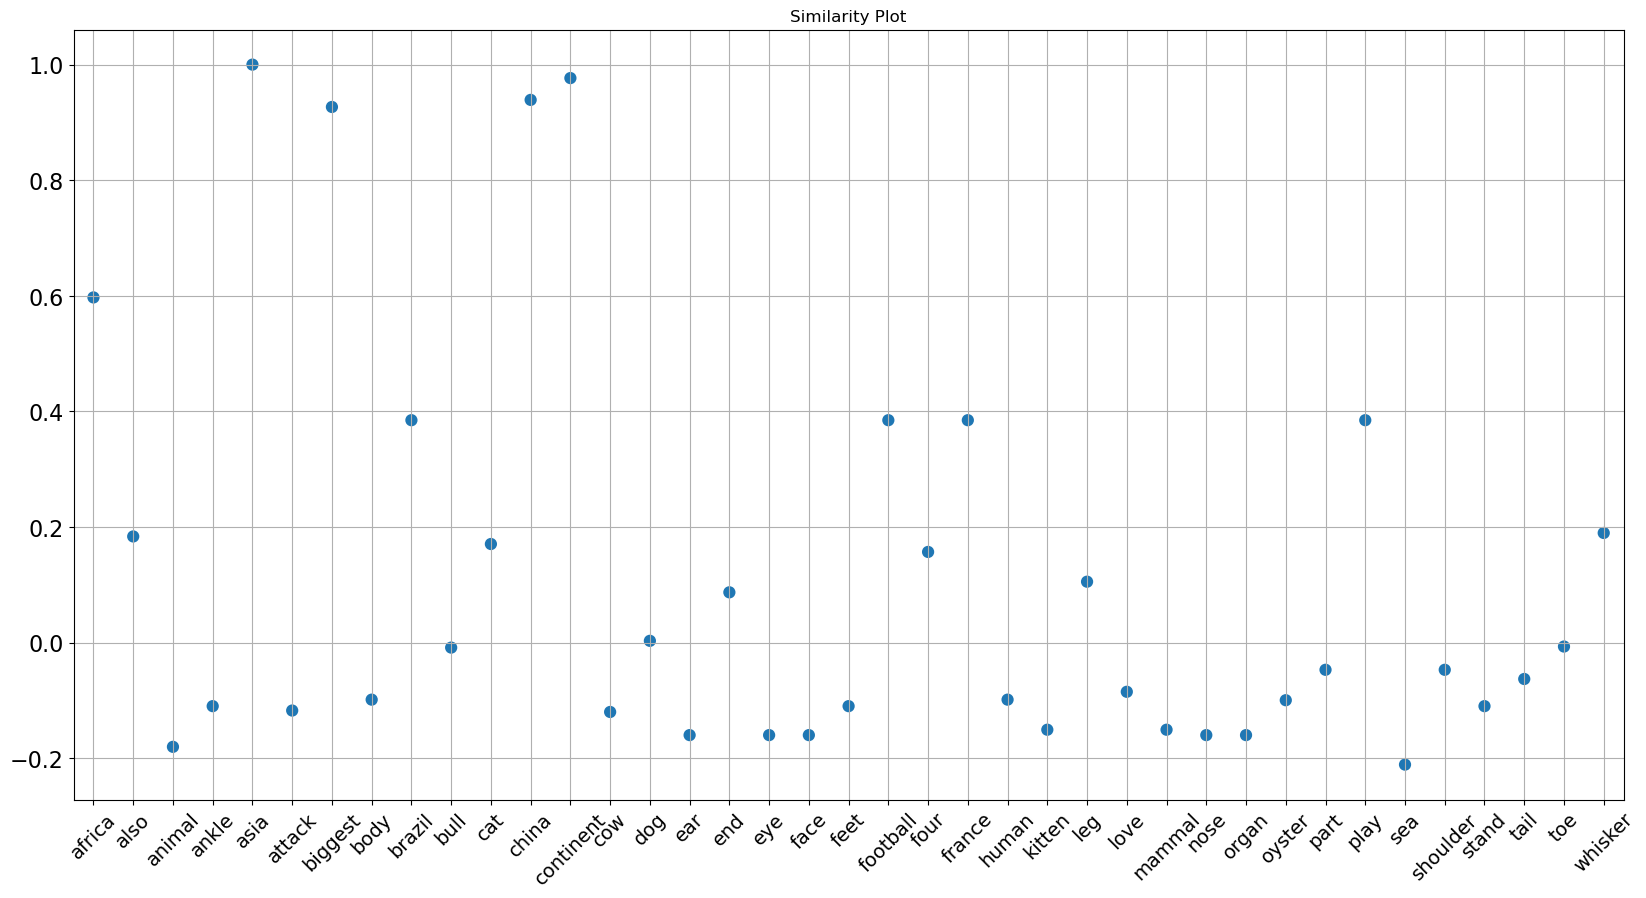

In [15]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45, fontsize=14)
plt.yticks(fontsize=16)
sns.pointplot(term_similarities, linestyles="")
plt.title('Similarity Plot')
plt.grid()

## Topic Modeling using LSA

What SVD does is decompose the matrix into `n_topics` that can clearly define the large matrix most accurately.

Each row in the `lsa_topic_matrix` represents the transformed tfidf value of words truncated to `n_topics`.

In [16]:
n_topics = 4
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(matrix)
lsa_topic_matrix

array([[ 6.48681641e-02, -7.54675880e-02,  6.15597748e-01,
         2.44348389e-01],
       [ 1.71072838e-01, -1.42860915e-01,  6.63111625e-01,
         1.54962599e-01],
       [ 3.69940903e-02, -4.67821995e-02,  4.64509990e-01,
         2.42457599e-01],
       [ 1.96840909e-01, -1.52410357e-01,  4.96392017e-01,
        -1.53308417e-02],
       [ 6.78097690e-01, -2.19481221e-01, -2.92228921e-01,
         4.58997662e-02],
       [ 2.17920034e-01,  3.61617643e-02, -1.89068115e-01,
         6.36353173e-01],
       [ 6.36815354e-01, -3.88288099e-01,  1.75005298e-01,
        -2.27395756e-01],
       [ 6.45292311e-01, -2.34924423e-01,  1.64022077e-01,
        -2.00809313e-01],
       [ 4.34627603e-01,  5.98108223e-03, -2.30753981e-01,
        -8.87261891e-03],
       [ 4.38677160e-01, -2.13827282e-01, -2.10835374e-01,
        -1.40159251e-01],
       [ 2.05616248e-01,  6.15483881e-01,  1.57022029e-01,
        -3.86616255e-01],
       [ 1.65029236e-01,  4.57774845e-01,  1.10478470e-01,
      

`keys` are the indices in every row of the `lsa_topic_matrix` with the maximum transformed value. 

Thus each `key` represents the topic which explains that particular document the most.

In [17]:
lsa_keys = lsa_topic_matrix.argmax(axis=1).tolist()
lsa_keys

[2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 1, 1, 3, 1, 3, 1, 0]

These `keys` are in themselves of no major significance.

They need to be mapped to the words in the term-document-matrix to figure out the words which they correspond to.


In [22]:
def get_top_n_words(n):
    
    top_indices = []
    # Get top words for every topic we need
    for topic in range(n_topics):
        temp_vector = 0
        for i in range(len(lsa_keys)):
            # If the key is same as topic number, we add the key position to the vector of the topic
            if lsa_keys[i] == topic:
                temp_vector += matrix[i]
        
        temp_vector_array = temp_vector.toarray()
        print(temp_vector_array.shape)
        # For each topic we get the n top words by sorting the vector
        top_n_word_indices = np.flip(np.argsort(temp_vector_array)[0][-n:],0)
        top_indices.append(top_n_word_indices)
      
    words = []
    for topic in top_indices:
        topic_words = []
        for index in topic:
            word = tfidf.get_feature_names_out()[index]
            topic_words.append(word)
        words.append(" ".join(topic_words))
       
    return words

We map the `keys` to the words in the matrix.

A key of 2 at position 3 means that, topic 2 can be represented by the words in document 3.

So for all positions of topic 2, we add the vector representation of the words from the tfidf matrix to this current topic's vector.

The topic's vector is then mapped to the tfidf feature names to get the top words explaining that topic.

In [23]:
top_n_words = get_top_n_words(8)

for i in range(len(top_n_words)):
    print(f"Topic {i+1}: ", top_n_words[i])


(1, 39)
(1, 39)
(1, 39)
(1, 39)
Topic 1:  dog cow bull cat four leg animal attack
Topic 2:  asia continent africa china cat biggest whisker part
Topic 3:  human body toe leg end shoulder part feet
Topic 4:  oyster sea whisker africa animal play football france


These are the topics that come out of from the singular value decomposition as the topics which can define the whole of corpus.

In [20]:
from collections import Counter


def keys_to_counts(keys):

    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

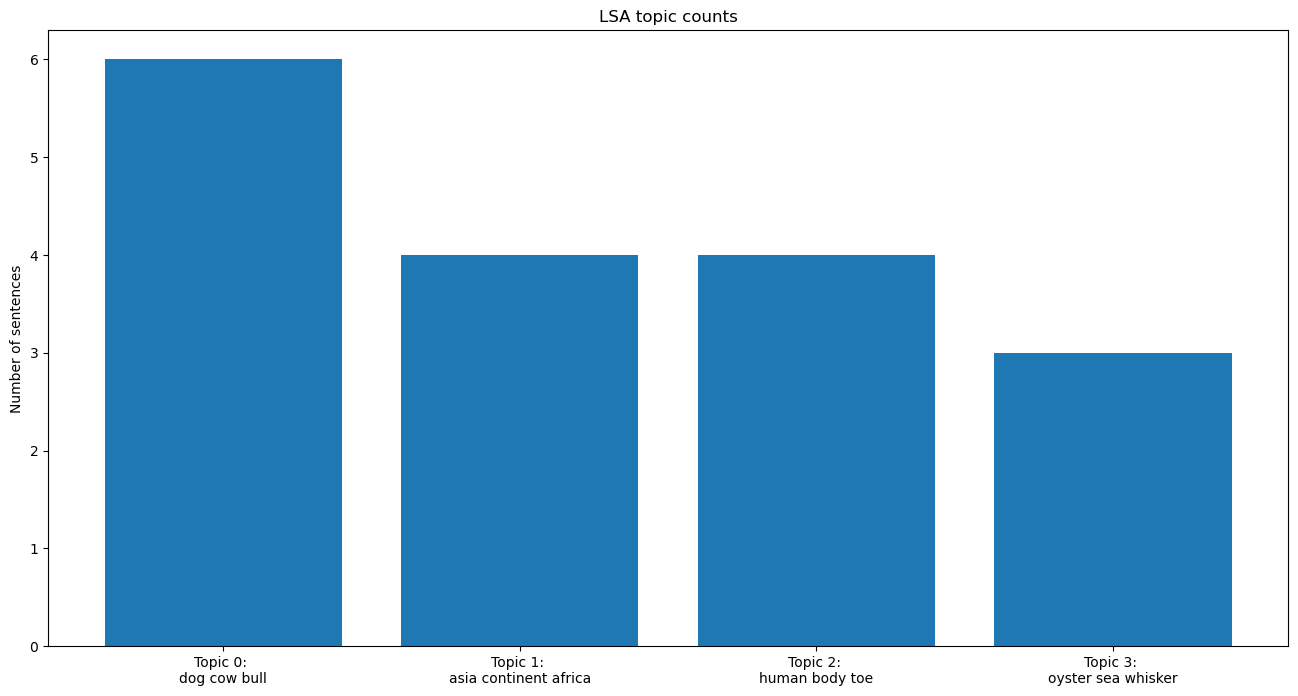

In [21]:
top_3_words = get_top_n_words(3)
labels = [f'Topic {i}: \n' + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts)
ax.set_xticks(lsa_categories)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of sentences')
ax.set_title('LSA topic counts')
plt.show()

The above plot shows how many sentences of a given topic are there in the corpus.